## Capstone Project - The Battle of the Neighborhoods 
### Applied Data Science Capstone by IBM/Coursera

### Shiyou Li 2019

## Table of Contents
* [Introduction: Business Problem](#introduction)
* [Data Source](#data)
* [Methodology](#methodology) 
* [Analysis](#analysis)
* [Results and Discussion](#result)
* [Conclusion](#conclcusion)

## Introduction: Business Problem  <a name="introduction"></a>

This project aims to select the safest borough in London based on the **total crimes**, explore the **neighborhoods** of that borough to find the **10 most common venues** in each neighborhood and finally cluster the neighborhoods using **k-mean clustering**.

This report will be targeted to people who are looking to **relocate to London**. Inorder to finalise a neighborhood to hunt for an apartment, **safety** is considered as a top concern when moving to a new place. If you don’t feel safe in your own home, you’re not going to be able to enjoy living there. The **crime statistics** will provide an insight into this issue.

We will focus on the safest borough and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood suited to an individual's needs can be selected.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* The total number of crimes commited in each of the borough during the last year.
* The most common venues in each of the neighborhood in the safest borough selected.

Following data sources will be needed to extract/generate the required information:

- [**Part 1**: Preprocessing a real world data set from Kaggle showing the London Crimes from 2008 to 2016](#part1):  A dataset consisting of the crime statistics of each borough in London obtained from Kaggle
- [**Part 2**: Scraping additional information of the different Boroughs in London from a Wikipedia page.](#part2): More information regarding the boroughs of London is scraped using the Beautifulsoup library
- [**Part 3**: Creating a new dataset of the Neighborhoods of the safest borough in London and generating their co-ordinates.](#part3): Co-ordinate of neighborhood will be obtained using **Google Maps API geocoding**

### Part 1: Preprocessing a real world data set from Kaggle showing the London Crimes from 2008 to 2016
<a name="part1"></a>


####  London Crime Data 

About this file


- lsoa_code: code for Lower Super Output Area in Greater London.
- borough: Common name for London borough.
- major_category: High level categorization of crime
- minor_category: Low level categorization of crime within major category.
- value: monthly reported count of categorical crime in given borough
- year: Year of reported counts, 2008-2016
- month: Month of reported counts, 1-12

Data set URL: https://www.kaggle.com/jboysen/london-crime

#### Import necessary libraries

In [19]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

import geocoder

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Folium installed
Libraries imported.


In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Define Foursquare Credentials and Version
Make sure that you have created a Foursquare developer account and have your credentials handy

In [21]:
CLIENT_ID = 'R01LINGO2WC45KLRLKT3ZHU2QENAO2IPRK2N2ELOHRNK4P3K' # your Foursquare ID
CLIENT_SECRET = '4JT1TWRMXMPLX5IOKNBAFU3L3ARXK4D5JJDPFK1CLRZM2ZVW' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R01LINGO2WC45KLRLKT3ZHU2QENAO2IPRK2N2ELOHRNK4P3K
CLIENT_SECRET:4JT1TWRMXMPLX5IOKNBAFU3L3ARXK4D5JJDPFK1CLRZM2ZVW


#### Read in the dataset

In [22]:
# Read in the data 
df = pd.read_csv("london_crime_by_lsoa.csv")

In [23]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [24]:
# View the top rows of the dataset
df = df.sort_values(["year", "month", 'borough'], ascending = (False, True, True))
df.head(1000)

,lsoa_code,borough,major_category,minor_category,value,year,month
926,E01000022,Barking and Dagenham,Violence Against the Person,Common Assault,1,2016,1
3113,E01000086,Barking and Dagenham,Violence Against the Person,Other violence,0,2016,1
4952,E01000010,Barking and Dagenham,Theft and Handling,Theft From Shops,20,2016,1
8561,E01000009,Barking and Dagenham,Burglary,Burglary in Other Buildings,0,2016,1
12171,E01000099,Barking and Dagenham,Theft and Handling,Handling Stolen Goods,0,2016,1
34233,E01000095,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2016,1
35648,E01000097,Barking and Dagenham,Violence Against the Person,Harassment,1,2016,1
41117,E01000036,Barking and Dagenham,Other Notifiable Offences,Other Notifiable,0,2016,1
54806,E01000102,Barking and Dagenham,Violence Against the Person,Offensive Weapon,0,2016,1
58118,E01000093,Barking and Dagenham,Violence Against the Person,Harassment,1,2016,1


In [25]:
df.reset_index(inplace = True)

In [26]:
df.drop(['index'], axis = 1, inplace = True)

In [27]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01000022,Barking and Dagenham,Violence Against the Person,Common Assault,1,2016,1
1,E01000086,Barking and Dagenham,Violence Against the Person,Other violence,0,2016,1
2,E01000010,Barking and Dagenham,Theft and Handling,Theft From Shops,20,2016,1
3,E01000009,Barking and Dagenham,Burglary,Burglary in Other Buildings,0,2016,1
4,E01000099,Barking and Dagenham,Theft and Handling,Handling Stolen Goods,0,2016,1


In [28]:
# Shape of the data frame
df.shape

(13490604, 7)

In [29]:
# View the top of the dataset 
df.head(1000)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01000022,Barking and Dagenham,Violence Against the Person,Common Assault,1,2016,1
1,E01000086,Barking and Dagenham,Violence Against the Person,Other violence,0,2016,1
2,E01000010,Barking and Dagenham,Theft and Handling,Theft From Shops,20,2016,1
3,E01000009,Barking and Dagenham,Burglary,Burglary in Other Buildings,0,2016,1
4,E01000099,Barking and Dagenham,Theft and Handling,Handling Stolen Goods,0,2016,1
5,E01000095,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2016,1
6,E01000097,Barking and Dagenham,Violence Against the Person,Harassment,1,2016,1
7,E01000036,Barking and Dagenham,Other Notifiable Offences,Other Notifiable,0,2016,1
8,E01000102,Barking and Dagenham,Violence Against the Person,Offensive Weapon,0,2016,1
9,E01000093,Barking and Dagenham,Violence Against the Person,Harassment,1,2016,1


#### Change the column names 

In [30]:
df.columns = ['LSOA_Code', 'Borough','Major_Category','Minor_Category','No_of_Crimes','Year','Month']
df.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,No_of_Crimes,Year,Month
0,E01000022,Barking and Dagenham,Violence Against the Person,Common Assault,1,2016,1
1,E01000086,Barking and Dagenham,Violence Against the Person,Other violence,0,2016,1
2,E01000010,Barking and Dagenham,Theft and Handling,Theft From Shops,20,2016,1
3,E01000009,Barking and Dagenham,Burglary,Burglary in Other Buildings,0,2016,1
4,E01000099,Barking and Dagenham,Theft and Handling,Handling Stolen Goods,0,2016,1


In [31]:
# View the information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
LSOA_Code         object
Borough           object
Major_Category    object
Minor_Category    object
No_of_Crimes      int64
Year              int64
Month             int64
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


#### Total number of crimes in each Borough

In [32]:
col = ['Borough','No_of_Crimes']
df_b = pd.DataFrame(df.groupby('Borough')['No_of_Crimes'].sum()).reset_index()

In [33]:
df_b

,Borough,No_of_Crimes
0,Barking and Dagenham,149447
1,Barnet,212191
2,Bexley,114136
3,Brent,227551
4,Bromley,184349
5,Camden,275147
6,City of London,780
7,Croydon,260294
8,Ealing,251562
9,Enfield,193880


#### The total crimes per major category

In [34]:
df_c = pd.DataFrame(df.groupby('Major_Category')['No_of_Crimes'].sum()).reset_index()

In [35]:
df_c

,Major_Category,No_of_Crimes
0,Burglary,754293
1,Criminal Damage,630938
2,Drugs,470765
3,Fraud or Forgery,5325
4,Other Notifiable Offences,106349
5,Robbery,258873
6,Sexual Offences,1273
7,Theft and Handling,2661861
8,Violence Against the Person,1558081


#### Pivoting the table to view the no. of crimes for each major category in each Borough 

In [43]:
London_crime = pd.pivot_table(df,values=['No_of_Crimes'],
                               index=['Borough'],
                               columns=['Major_Category'],
                               aggfunc=np.sum,fill_value=0)
London_crime.head()

No_of_Crimes                                          \
Major_Category           Burglary Criminal Damage  Drugs Fraud or Forgery   
Borough                                                                     
Barking and Dagenham        18103           18888   9188              205   
Barnet                      36981           21024   9796              175   
Bexley                      14973           17244   7346              106   
Brent                       28923           20569  25978              157   
Bromley                     27135           24039   8942              196   

                                                                        \
Major_Category       Other Notifiable Offences Robbery Sexual Offences   
Borough                                                                  
Barking and Dagenham                      2819    6105              49   
Barnet                                    2953    7374              38   
Bexley                                    1999    2338              22   
Brent                                     3711   12473              39   
Bromley                                   2637    4868              31   

                                                                     
Major_Category       Theft and Handling Violence Against the Person  
Borough                                                              
Barking and Dagenham              50999                       43091  
Barnet                            87285                       46565  
Bexley                            40071                       30037  
Brent                             72523                       63178  
Bromley                           69742                       46759

In [45]:
London_crime

No_of_Crimes                                          \
Major_Category             Burglary Criminal Damage  Drugs Fraud or Forgery   
Borough                                                                       
Barking and Dagenham          18103           18888   9188              205   
Barnet                        36981           21024   9796              175   
Bexley                        14973           17244   7346              106   
Brent                         28923           20569  25978              157   
Bromley                       27135           24039   8942              196   
Camden                        27939           18482  21816              123   
City of London                   15              16     33                0   
Croydon                       33376           31218  19162              270   
Ealing                        30831           25613  18591              175   
Enfield                       30213           22487  13251              132   
Greenwich                     20966           22755  10836              107   
Hackney                       21450           17327  18144              143   
Hammersmith and Fulham        17010           14595  15492               91   
Haringey                      28213           22272  14563              207   
Harrow                        19630           12724   7122               92   
Havering                      21302           17252   8171              179   
Hillingdon                    26056           24485  11413              223   
Hounslow                      21026           21407  13722              183   
Islington                     22207           18354  16553               85   
Kensington and Chelsea        14980            9839  14573               85   
Kingston upon Thames          10131           10610   5682               65   
Lambeth                       30199           26136  25083              137   
Lewisham                      24871           24810  16825              262   
Merton                        16485           14339   6651              111   
Newham                        25356           24177  18389              323   
Redbridge                     26735           17543  15736              284   
Richmond upon Thames          16097           11722   4707               37   
Southwark                     27980           24450  27381              321   
Sutton                        13207           14474   4586               57   
Tower Hamlets                 21510           21593  23408              124   
Waltham Forest                25565           20459  14101              236   
Wandsworth                    25533           19630   9493              161   
Westminster                   29295           20405  34031              273   

                                                                          \
Major_Category         Other Notifiable Offences Robbery Sexual Offences   
Borough                                                                    
Barking and Dagenham                        2819    6105              49   
Barnet                                      2953    7374              38   
Bexley                                      1999    2338              22   
Brent                                       3711   12473              39   
Bromley                                     2637    4868              31   
Camden                                      3857    9286              36   
City of London                                17      24               0   
Croydon                                     4340   12645              55   
Ealing                                      4406    9568              52   
Enfield                                     3293    9059              38   
Greenwich                                   3598    5430              56   
Hackney                                     3332    8975              46   
Hammersmith and Fulham                

In [46]:
# Reset the index
London_crime.reset_index(inplace = True)

In [47]:
# Total crimes per Borough
London_crime['Total'] = London_crime.sum(axis=1)
London_crime.head(33)

Borough No_of_Crimes                         \
Major_Category                             Burglary Criminal Damage  Drugs   
0                 Barking and Dagenham        18103           18888   9188   
1                               Barnet        36981           21024   9796   
2                               Bexley        14973           17244   7346   
3                                Brent        28923           20569  25978   
4                              Bromley        27135           24039   8942   
5                               Camden        27939           18482  21816   
6                       City of London           15              16     33   
7                              Croydon        33376           31218  19162   
8                               Ealing        30831           25613  18591   
9                              Enfield        30213           22487  13251   
10                           Greenwich        20966           22755  10836   
11                             Hackney        21450           17327  18144   
12              Hammersmith and Fulham        17010           14595  15492   
13                            Haringey        28213           22272  14563   
14                              Harrow        19630           12724   7122   
15                            Havering        21302           17252   8171   
16                          Hillingdon        26056           24485  11413   
17                            Hounslow        21026           21407  13722   
18                           Islington        22207           18354  16553   
19              Kensington and Chelsea        14980            9839  14573   
20                Kingston upon Thames        10131           10610   5682   
21                             Lambeth        30199           26136  25083   
22                            Lewisham        24871           24810  16825   
23                              Merton        16485           14339   6651   
24                              Newham        25356           24177  18389   
25                           Redbridge        26735           17543  15736   
26                Richmond upon Thames        16097           11722   4707   
27                           Southwark        27980           24450  27381   
28                              Sutton        13207           14474   4586   
29                       Tower Hamlets        21510           21593  23408   
30                      Waltham Forest        25565           20459  14101   
31                          Wandsworth        25533           19630   9493   
32                         Westminster        29295           20405  34031   

                                                                   \
Major_Category Fraud or Forgery Other Notifiable Offences Robbery   
0                           205                      2819    6105   
1                           175                      2953    7374   
2                           106                      1999    2338   
3                           157                      3711   12473   
4                           196                      2637    4868   
5                           123                      3857    9286   
6                             0                        17      24   
7                           270                      4340   12645   
8                           175                      4406    9568   
9                           132                      3293    9059   
10                          107                      3598    5430   
11                          143                      3332    8975   
12                           91                      3352    5279   
13                          207                      2971   10084   
14                           92                      1998    4242   
15                          179                      2358    3089   
16                          223                      6504 

In [50]:
London_crime.columns

MultiIndex(levels=[['No_of_Crimes', 'Borough', 'Total'], ['Burglary', 'Criminal Damage', 'Drugs', 'Fraud or Forgery', 'Other Notifiable Offences', 'Robbery', 'Sexual Offences', 'Theft and Handling', 'Violence Against the Person', '']],
           labels=[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=[None, 'Major_Category'])

#### Removing the multi index so that it will be easier to merge

In [51]:
London_crime.columns = London_crime.columns.map(''.join)
London_crime.head()

,Borough,No_of_CrimesBurglary,No_of_CrimesCriminal Damage,No_of_CrimesDrugs,No_of_CrimesFraud or Forgery,No_of_CrimesOther Notifiable Offences,No_of_CrimesRobbery,No_of_CrimesSexual Offences,No_of_CrimesTheft and Handling,No_of_CrimesViolence Against the Person,Total
0,Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091,149447
1,Barnet,36981,21024,9796,175,2953,7374,38,87285,46565,212191
2,Bexley,14973,17244,7346,106,1999,2338,22,40071,30037,114136
3,Brent,28923,20569,25978,157,3711,12473,39,72523,63178,227551
4,Bromley,27135,24039,8942,196,2637,4868,31,69742,46759,184349


In [52]:
London_crime.columns

Index(['Borough', 'No_of_CrimesBurglary', 'No_of_CrimesCriminal Damage',
       'No_of_CrimesDrugs', 'No_of_CrimesFraud or Forgery',
       'No_of_CrimesOther Notifiable Offences', 'No_of_CrimesRobbery',
       'No_of_CrimesSexual Offences', 'No_of_CrimesTheft and Handling',
       'No_of_CrimesViolence Against the Person', 'Total'],
      dtype='object')

#### Renaming the columns

In [53]:
London_crime.columns = ['Borough','Burglary', 'Criminal Damage','Drugs','Fraud','Other Notifiable Offences', 
                        'Robbery','CrimesSexual Offences', 'Theft and Handling','Violence Against the Person','Total']
London_crime.head()

,Borough,Burglary,Criminal Damage,Drugs,Fraud,Other Notifiable Offences,Robbery,CrimesSexual Offences,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091,149447
1,Barnet,36981,21024,9796,175,2953,7374,38,87285,46565,212191
2,Bexley,14973,17244,7346,106,1999,2338,22,40071,30037,114136
3,Brent,28923,20569,25978,157,3711,12473,39,72523,63178,227551
4,Bromley,27135,24039,8942,196,2637,4868,31,69742,46759,184349


In [54]:
# Shape of the data set 
London_crime.shape

(33, 11)

In [55]:
# View the Columns in the data frame
London_crime.columns.tolist()

['Borough',
 'Burglary',
 'Criminal Damage',
 'Drugs',
 'Fraud',
 'Other Notifiable Offences',
 'Robbery',
 'CrimesSexual Offences',
 'Theft and Handling',
 'Violence Against the Person',
 'Total']

### Part 2: Scraping additional information of the different Boroughs in London from a Wikipedia page <a name="part2"></a>
 
**Using Beautiful soup to scrap the latitude and longitiude of the boroughs in London**

URL: https://en.wikipedia.org/wiki/List_of_London_boroughs

In [56]:
# getting data from internet
wikipedia_link='https://en.wikipedia.org/wiki/List_of_London_boroughs'
raw_wikipedia_page= requests.get(wikipedia_link).text

# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(raw_wikipedia_page,'xml')
print(soup.prettify())


<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="UTF-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XoWFwQpAICoAAFpo6F4AAABX","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":943613985,"wgRevisionId":943613985,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates"

In [57]:
# extracting the raw table inside that webpage
table = soup.find_all('table', {'class':'wikitable sortable'})
print(table)

[<table class="wikitable sortable" style="font-size:100%" width="100%">
<tbody><tr>
<th>Borough
</th>
<th>Inner
</th>
<th>Status
</th>
<th>Local authority
</th>
<th>Political control
</th>
<th>Headquarters
</th>
<th>Area (sq mi)
</th>
<th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Co-ordinates
</th>
<th><span style="background:#67BCD3"> Nr. in map </span>
</th></tr>
<tr>
<td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
</td>
<td>
</td>
<td>
</td>
<td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
</td>
<td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
</td>
<td><a class="new" href="/w/index.php?title=Barking_Town_Hall&amp;actio

#### Converting the table into a data frame 

In [58]:
London_table = pd.read_html(str(table[0]), index_col=None, header=0)[0]
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


#### The second table on the site contains the addition Borough i.e. City of London

In [59]:
# Read in the second table 
London_table1 = pd.read_html(str(table[1]), index_col=None, header=0)[0]

# Rename the columns to match the previous table to append the tables.

London_table1.columns = ['Borough','Inner','Status','Local authority','Political control',
                         'Headquarters','Area (sq mi)','Population (2013 est)[1]','Co-ordinates','Nr. in map']

# View the table
London_table1

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


#### Append the data frame together

In [60]:
# A continuous index value will be maintained 
# across the rows in the new appended data frame. 

London_table = London_table.append(London_table1, ignore_index = True) 
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


#### Check if the last row was appended correctly

In [61]:
London_table.tail()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
28,Tower Hamlets,NaN,NaN,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,8
29,Waltham Forest,NaN,NaN,Waltham Forest London Borough Council,Labour,"Waltham Forest Town Hall, Forest Road",14.99,265797,51°35′27″N 0°00′48″W﻿ / ﻿51.5908°N 0.0134°W,28
30,Wandsworth,NaN,NaN,Wandsworth London Borough Council,Conservative,"The Town Hall, Wandsworth High Street",13.23,310516,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W,5
31,Westminster,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2
32,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


#### View the information of the data set

In [62]:
London_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
Borough                     33 non-null object
Inner                       4 non-null object
Status                      5 non-null object
Local authority             33 non-null object
Political control           33 non-null object
Headquarters                33 non-null object
Area (sq mi)                33 non-null float64
Population (2013 est)[1]    33 non-null int64
Co-ordinates                33 non-null object
Nr. in map                  33 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ KB


#### Removing Unnecessary string in the Data set

In [63]:
London_table = London_table.replace('note 1','', regex=True) 
London_table = London_table.replace('note 2','', regex=True) 
London_table = London_table.replace('note 3','', regex=True) 
London_table = London_table.replace('note 4','', regex=True) 
London_table = London_table.replace('note 5','', regex=True) 

# View the top of the data set
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


#### Check the type of the newly created table

In [64]:
type(London_table)

pandas.core.frame.DataFrame

In [65]:
# Shape of the data frame
London_table.shape

(33, 10)

#### Check if the Borough in both the data frames match.

In [66]:
set(df.Borough) - set(London_table.Borough)

{'Barking and Dagenham', 'Greenwich', 'Hammersmith and Fulham'}

These 3 Boroughs don't match because of the unnecessary symobols present "[]" 

#### Find the index of the Boroughs that didn't match

In [67]:
print("The index of first borough is",London_table.index[London_table['Borough'] == 'Barking and Dagenham []'].tolist())
print("The index of second borough is",London_table.index[London_table['Borough'] == 'Greenwich []'].tolist())
print("The index of third borough is",London_table.index[London_table['Borough'] == 'Hammersmith and Fulham []'].tolist())

The index of first borough is [0]
The index of second borough is [9]
The index of third borough is [11]


#### Changing the Borough names to match the other data frame

In [68]:
London_table.iloc[0,0] = 'Barking and Dagenham'
London_table.iloc[9,0] = 'Greenwich'
London_table.iloc[11,0] = 'Hammersmith and Fulham'

#### Check if the Borough names in both data sets match

In [69]:
set(df.Borough) - set(London_table.Borough)

set()

The Borough names in both data frames match 

#### We can combine both the data frames together

In [124]:
Ld_crime = pd.merge(London_crime, London_table, on='Borough')
Ld_crime.head(5)

,Borough,Burglary,Criminal Damage,Drugs,Fraud,Other Notifiable Offences,Robbery,CrimesSexual Offences,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091,149447,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,36981,21024,9796,175,2953,7374,38,87285,46565,212191,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,14973,17244,7346,106,1999,2338,22,40071,30037,114136,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,28923,20569,25978,157,3711,12473,39,72523,63178,227551,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,27135,24039,8942,196,2637,4868,31,69742,46759,184349,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [71]:
Ld_crime.shape

(33, 20)

In [72]:
set(df.Borough) - set(Ld_crime.Borough)

set()

#### Rearranging the Columns 

In [73]:
# List of Column names of the data frame 
list(Ld_crime)

['Borough',
 'Burglary',
 'Criminal Damage',
 'Drugs',
 'Fraud',
 'Other Notifiable Offences',
 'Robbery',
 'CrimesSexual Offences',
 'Theft and Handling',
 'Violence Against the Person',
 'Total',
 'Inner',
 'Status',
 'Local authority',
 'Political control',
 'Headquarters',
 'Area (sq mi)',
 'Population (2013 est)[1]',
 'Co-ordinates',
 'Nr. in map']

In [74]:
Ld_crime.reindex()

,Borough,Burglary,Criminal Damage,Drugs,Fraud,Other Notifiable Offences,Robbery,CrimesSexual Offences,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091,149447,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,36981,21024,9796,175,2953,7374,38,87285,46565,212191,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,14973,17244,7346,106,1999,2338,22,40071,30037,114136,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,28923,20569,25978,157,3711,12473,39,72523,63178,227551,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,27135,24039,8942,196,2637,4868,31,69742,46759,184349,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,27939,18482,21816,123,3857,9286,36,140596,53012,275147,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,City of London,15,16,33,0,17,24,0,561,114,780,([],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1
7,Croydon,33376,31218,19162,270,4340,12645,55,91437,67791,260294,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
8,Ealing,30831,25613,18591,175,4406,9568,52,93834,68492,251562,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
9,Enfield,30213,22487,13251,132,3293,9059,38,70371,45036,193880,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30


In [75]:
columnsTitles = ['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]',
                 'Inner','Status',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total','Co-ordinates']

Ld_crime = Ld_crime.reindex(columns=columnsTitles)

Ld_crime = Ld_crime[['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]','Co-ordinates',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total']]

Ld_crime.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,18103,18888,9188,2819,6105,50999,43091,149447
1,Barnet,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,36981,21024,9796,2953,7374,87285,46565,212191
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,14973,17244,7346,1999,2338,40071,30037,114136
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,28923,20569,25978,3711,12473,72523,63178,227551
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,27135,24039,8942,2637,4868,69742,46759,184349


## Methodology <a name="methodology"></a>

The methodology in this project consists of two parts:
- [Exploratory Data Analysis](#EDA): Visualise the crime rates in the London boroughs to idenity the safest borough and extract the neighborhoods in that borough to find the 10 most common venues in each neighborhood.


- [Modelling](#modelling): To help people find similar neighborhoods in the safest borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use a cluster size of 5 for this project that will cluster the 15 neighborhoods into 5 clusters. The reason to conduct a K- means clustering is to cluster neighborhoods with similar venues together so that people can shortlist the area of their interests based on the venues/amenities around each neighborhood.
 

### Exploratory Data Analysis <a name="EDA"></a>

#### Descriptive statistics of the data

In [76]:
London_crime.describe()

,Burglary,Criminal Damage,Drugs,Fraud,Other Notifiable Offences,Robbery,CrimesSexual Offences,Theft and Handling,Violence Against the Person,Total
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,22857.363636,19119.333333,14265.606061,161.363636,3222.696970,7844.636364,38.575758,80662.454545,47214.575758,195386.606061
std,7452.366846,5942.903618,7544.259564,81.603775,1362.107294,4677.643075,15.139002,45155.624776,17226.165191,79148.057551
min,15.000000,16.000000,33.000000,0.000000,17.000000,24.000000,0.000000,561.000000,114.000000,780.000000
25%,18103.000000,17244.000000,8942.000000,106.000000,2358.000000,4744.000000,27.000000,52609.000000,33968.000000,149447.000000
50%,24871.000000,20405.000000,14101.000000,157.000000,3293.000000,7688.000000,40.000000,77940.000000,50943.000000,203879.000000
75%,27980.000000,22755.000000,18389.000000,207.000000,3963.000000,10084.000000,47.000000,92523.000000,59993.000000,228613.000000
max,36981.000000,31218.000000,34031.000000,323.000000,6504.000000,18408.000000,71.000000,277617.000000,72726.000000,455028.000000


In [78]:
London_crime.columns

Index(['Borough', 'Burglary', 'Criminal Damage', 'Drugs', 'Fraud',
       'Other Notifiable Offences', 'Robbery', 'CrimesSexual Offences',
       'Theft and Handling', 'Violence Against the Person', 'Total'],
      dtype='object')

In [79]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.0.2


#### Check if the column names are strings 

In [80]:
Ld_crime.columns = list(map(str, Ld_crime.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in Ld_crime.columns)

True

#### Sort the total crimes in descenting order to see 5  boroughs with the highest number of crimes 

In [81]:
Ld_crime.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

df_top5 = Ld_crime.head() 
df_top5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
32,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,29295,20405,34031,6148,15752,277617,71448,455028
21,Lambeth,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,314242,51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W,30199,26136,25083,4520,18408,114899,72726,292178
27,Southwark,Southwark London Borough Council,Labour,160 Tooley Street,11.14,298464,51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W,27980,24450,27381,4696,16153,109432,68356,278809
5,Camden,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,27939,18482,21816,3857,9286,140596,53012,275147
24,Newham,Newham London Borough Council,Labour,"Newham Dockside, 1000 Dockside Road",13.98,318227,51°30′28″N 0°02′49″E﻿ / ﻿51.5077°N 0.0469°E,25356,24177,18389,4456,16913,106146,66221,262024


#### Visualize the five boroughs with the highest number of crimes 

Text(0, 0.5, 'Number of Crimes')

Text(0.5, 0, 'Borough')

Text(0.5, 1.0, 'London Boroughs with the Highest no. of crime')

Text(0, 10, '455028')

Text(0, 10, '292178')

Text(0, 10, '278809')

Text(0, 10, '275147')

Text(0, 10, '262024')

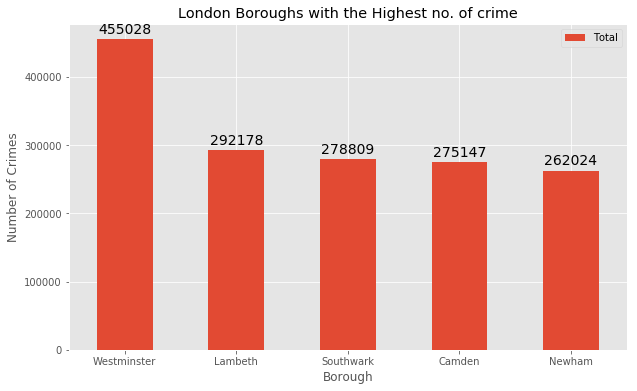

In [82]:
df_tt = df_top5[['Borough','Total']]

df_tt.set_index('Borough',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

### We'll stay clear from these places :)

#### Sort the total crimes in ascending order to see 5  boroughs with the least number of crimes 

In [83]:
Ld_crime.sort_values(['Total'], ascending = True, axis = 0, inplace = True )

df_bot5 = Ld_crime.head() 
df_bot5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
6,City of London,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,15,16,33,17,24,561,114,780
20,Kingston upon Thames,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,10131,10610,5682,1332,1702,38226,21540,89306
26,Richmond upon Thames,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,16097,11722,4707,1420,1590,40858,20314,96771
28,Sutton,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,13207,14474,4586,1393,2308,39533,25409,100987
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,14973,17244,7346,1999,2338,40071,30037,114136


#### Visualize the five boroughs with the least number of crimes 

Text(0, 0.5, 'Number of Crimes')

Text(0.5, 0, 'Borough')

Text(0.5, 1.0, 'London Boroughs with the least no. of crime')

Text(0, 10, '780')

Text(0, 10, '89306')

Text(0, 10, '96771')

Text(0, 10, '100987')

Text(0, 10, '114136')

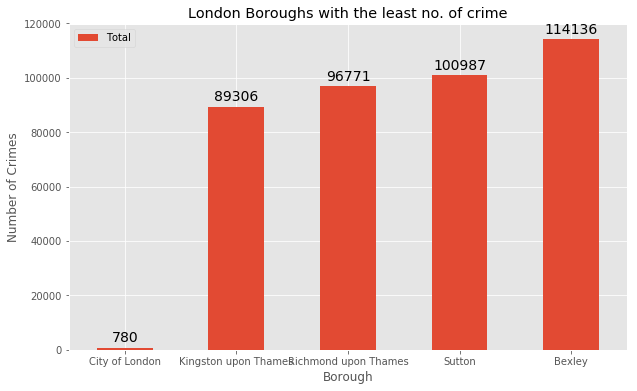

In [84]:
df_bt = df_bot5[['Borough','Total']]

df_bt.set_index('Borough',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

The borough City of London has the lowest no. of crimes recorded for the year 2016, Looking into the details of the borough: 

In [85]:
df_col = df_bot5[df_bot5['Borough'] == 'City of London']
df_col = df_col[['Borough','Total','Area (sq mi)','Population (2013 est)[1]']]
df_col

,Borough,Total,Area (sq mi),Population (2013 est)[1]
6,City of London,780,1.12,7000


#### As per the wikipedia page, The City of London is the 33rd principal division of Greater London but it is not a London borough. 
URL: https://en.wikipedia.org/wiki/List_of_London_boroughs

#### Hence we will focus on the next borough with the least crime i.e. Kingston upon Thames

### Visualizing different types of crimes in the borough 'Kingston upon Thames'

Text(0, 0.5, 'Number of Crimes')

Text(0.5, 0, 'Borough')

Text(0.5, 1.0, 'London Boroughs with the least no. of crime')

Text(0, 10, '10131')

Text(0, 10, '10610')

Text(0, 10, '5682')

Text(0, 10, '1332')

Text(0, 10, '1702')

Text(0, 10, '38226')

Text(0, 10, '21540')

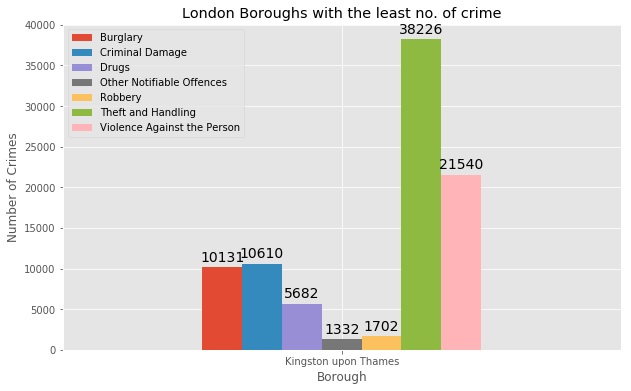

In [86]:
df_bc1 =  df_bot5[df_bot5['Borough'] == 'Kingston upon Thames']

df_bc = df_bc1[['Borough','Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person']]


df_bc.set_index('Borough',inplace = True)

ax = df_bc.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()


In [87]:
df_bc

,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person
Borough,,,,,,,
Kingston upon Thames,10131,10610,5682,1332,1702,38226,21540


We can conclude that Kingston upon Thames is the safest borough when compared to the other boroughs in London. 

### Part 3: Creating a new dataset of the Neighborhoods of the safest borough in London and generating their co-ordinates. <a name="part3"></a>



The list of Neighborhoods in the Royal Borough of Kingston upon Thames was found on a wikipedia page: https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames

In [88]:
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,,
1,Canbury,Kingston upon Thames,,
2,Chessington,Kingston upon Thames,,
3,Coombe,Kingston upon Thames,,
4,Hook,Kingston upon Thames,,
5,Kingston upon Thames,Kingston upon Thames,,
6,Kingston Vale,Kingston upon Thames,,
7,Malden Rushett,Kingston upon Thames,,
8,Motspur Park,Kingston upon Thames,,
9,New Malden,Kingston upon Thames,,


#### Find the Co-ordiantes of each Neighborhood in the Kingston upon Thames Neighborhood

In [89]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[51.3937811, 51.41749865, 51.358336, 51.4194499, 51.3678984, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3926421, 51.3937557, 51.3788758] [-0.2848024, -0.30555280504926163, -0.2986216, -0.2653985, -0.3071453, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3143662, -0.3033105, -0.2828604]


In [92]:
df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


#### Get the co-ordinates of Berrylands, London, United Kingdom (The center neighborhood of Kingston upon Thames)

In [90]:
address = 'Berrylands, London, United Kingdom'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berrylands, London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berrylands, London are 51.3937811, -0.2848024.


#### Visualize the Neighborhood of Kingston upon Thames Borough

In [93]:
# create map of New York using latitude and longitude values
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neig['Latitude'], kut_neig['Longitude'], kut_neig['Borough'], kut_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

### Modelling <a name="modelling"></a>

- Finding all the venues within a 500 meter radius of each neighborhood.
- Perform one hot ecoding on the venues data.
- Grouping the venues by the neighborhood and calculating their mean.
- Performing a K-means clustering (Defining K = 5)

#### Create a function to extract the venues from each Neighborhood

In [94]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [95]:
kut_venues = getNearbyVenues(names=kut_neig['Neighborhood'],
                                   latitudes=kut_neig['Latitude'],
                                   longitudes=kut_neig['Longitude']
                                  )


Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth


In [96]:
print(kut_venues.shape)
kut_venues.head()

(171, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Alexandra Park,51.394230,-0.281206,Park
2,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop
3,Canbury,51.417499,-0.305553,Canbury Gardens,51.417409,-0.305300,Park
4,Canbury,51.417499,-0.305553,The Grey Horse,51.414192,-0.300759,Pub


In [97]:
kut_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berrylands,3,3,3,3,3,3
Canbury,14,14,14,14,14,14
Chessington,1,1,1,1,1,1
Hook,4,4,4,4,4,4
Kingston Vale,4,4,4,4,4,4
Kingston upon Thames,30,30,30,30,30,30
Malden Rushett,4,4,4,4,4,4
Motspur Park,5,5,5,5,5,5
New Malden,9,9,9,9,9,9


In [98]:
print('There are {} uniques categories.'.format(len(kut_venues['Venue Category'].unique())))

There are 68 uniques categories.


#### One hot encoding

URL: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [99]:
# one hot encoding
kut_onehot = pd.get_dummies(kut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kut_onehot['Neighborhood'] = kut_venues['Neighborhood']

In [64]:
kut_onehot.head()

,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,Bistro,Bookstore,Bowling Alley,Breakfast Spot,...,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Berrylands
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Berrylands
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Berrylands
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Berrylands
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Canbury


In [100]:
# move neighborhood column to the first column
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Neighborhood,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beer Bar,Bistro,Bookstore,Bowling Alley,Breakfast Spot,...,Seafood Restaurant,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station
0,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [101]:
kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped

,Neighborhood,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beer Bar,Bistro,Bookstore,Bowling Alley,Breakfast Spot,...,Seafood Restaurant,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station
0,Berrylands,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Canbury,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.071429,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000
2,Chessington,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Hook,0.000000,0.00,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kingston Vale,0.000000,0.00,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Kingston upon Thames,0.033333,0.00,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.033333,0.033333,0.000000
6,Malden Rushett,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Motspur Park,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,New Malden,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000
9,Norbiton,0.000000,0.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.04,0.000000,0.000000,0.040000,0.040000,0.000000,0.000000,0.040000,0.000000,0.000000


In [102]:
kut_grouped.shape

(14, 69)

In [103]:
temp = kut_grouped[kut_grouped['Neighborhood'] == 'Berrylands'].T.reset_index()
temp.columns = ['venue','freq']
temp.iloc[1:,]

,venue,freq
1,Asian Restaurant,0
2,Athletics & Sports,0
3,Bakery,0
4,Bar,0
5,Beer Bar,0
6,Bistro,0
7,Bookstore,0
8,Bowling Alley,0
9,Breakfast Spot,0
10,Burger Joint,0


In [104]:
num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berrylands----
                  venue  freq
0  Gym / Fitness Center  0.33
1                  Park  0.33
2              Bus Stop  0.33
3                Market  0.00
4              Pharmacy  0.00


----Canbury----
               venue  freq
0                Pub  0.29
1              Plaza  0.07
2     Shop & Service  0.07
3              Hotel  0.07
4  Indian Restaurant  0.07


----Chessington----
                        venue  freq
0  Construction & Landscaping   1.0
1            Asian Restaurant   0.0
2                      Market   0.0
3                    Pharmacy   0.0
4                    Pet Café   0.0


----Hook----
               venue  freq
0             Bakery  0.25
1  Indian Restaurant  0.25
2        Supermarket  0.25
3  Fish & Chips Shop  0.25
4   Asian Restaurant  0.00


----Kingston Vale----
            venue  freq
0   Grocery Store  0.25
1             Bar  0.25
2  Sandwich Place  0.25
3    Soccer Field  0.25
4  Hardware Store  0.00


----Kingston upon Thames----
       

#### Create a data frame of the venues 
Function to sort the venues in descending order.

In [105]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood

In [106]:
kut_grouped.shape[0]

14

In [107]:
kut_grouped

,Neighborhood,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beer Bar,Bistro,Bookstore,Bowling Alley,Breakfast Spot,...,Seafood Restaurant,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station
0,Berrylands,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Canbury,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.071429,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000
2,Chessington,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Hook,0.000000,0.00,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kingston Vale,0.000000,0.00,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Kingston upon Thames,0.033333,0.00,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.033333,0.033333,0.000000
6,Malden Rushett,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Motspur Park,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,New Malden,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000
9,Norbiton,0.000000,0.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.04,0.000000,0.000000,0.040000,0.040000,0.000000,0.000000,0.040000,0.000000,0.000000


In [108]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Park,Gym / Fitness Center,Bus Stop,Train Station,Fast Food Restaurant,Department Store,Discount Store,Electronics Store,Farmers Market,Fish & Chips Shop
1,Canbury,Pub,Park,Fish & Chips Shop,Supermarket,Spa,Shop & Service,Café,Gym / Fitness Center,Indian Restaurant,Plaza
2,Chessington,Construction & Landscaping,Fish & Chips Shop,Deli / Bodega,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Train Station,Cosmetics Shop
3,Hook,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Train Station,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant
4,Kingston Vale,Grocery Store,Bar,Soccer Field,Sandwich Place,Train Station,Fast Food Restaurant,Deli / Bodega,Department Store,Discount Store,Electronics Store


### Clustering similar neighborhoods together using k - means clustering

In [109]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 1, 0, 4, 0, 0, 3, 0, 0])

In [110]:
kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


In [111]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kut_merged = kut_neig

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kut_merged.head() # check the last columns!

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,3.0,Park,Gym / Fitness Center,Bus Stop,Train Station,Fast Food Restaurant,Department Store,Discount Store,Electronics Store,Farmers Market,Fish & Chips Shop
1,Canbury,Kingston upon Thames,51.417499,-0.305553,0.0,Pub,Park,Fish & Chips Shop,Supermarket,Spa,Shop & Service,Café,Gym / Fitness Center,Indian Restaurant,Plaza
2,Chessington,Kingston upon Thames,51.358336,-0.298622,1.0,Construction & Landscaping,Fish & Chips Shop,Deli / Bodega,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Train Station,Cosmetics Shop
3,Coombe,Kingston upon Thames,51.419450,-0.265398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hook,Kingston upon Thames,51.367898,-0.307145,0.0,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Train Station,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant


In [112]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
Neighborhood              15 non-null object
Borough                   15 non-null object
Latitude                  15 non-null float64
Longitude                 15 non-null float64
Cluster Labels            14 non-null float64
1st Most Common Venue     14 non-null object
2nd Most Common Venue     14 non-null object
3rd Most Common Venue     14 non-null object
4th Most Common Venue     14 non-null object
5th Most Common Venue     14 non-null object
6th Most Common Venue     14 non-null object
7th Most Common Venue     14 non-null object
8th Most Common Venue     14 non-null object
9th Most Common Venue     14 non-null object
10th Most Common Venue    14 non-null object
dtypes: float64(3), object(12)
memory usage: 1.8+ KB


In [113]:
# Dropping the row with the NaN value 
kut_merged.dropna(inplace = True)

In [114]:
kut_merged.shape

(14, 15)

In [115]:
kut_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)

In [116]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 14
Data columns (total 15 columns):
Neighborhood              14 non-null object
Borough                   14 non-null object
Latitude                  14 non-null float64
Longitude                 14 non-null float64
Cluster Labels            14 non-null int32
1st Most Common Venue     14 non-null object
2nd Most Common Venue     14 non-null object
3rd Most Common Venue     14 non-null object
4th Most Common Venue     14 non-null object
5th Most Common Venue     14 non-null object
6th Most Common Venue     14 non-null object
7th Most Common Venue     14 non-null object
8th Most Common Venue     14 non-null object
9th Most Common Venue     14 non-null object
10th Most Common Venue    14 non-null object
dtypes: float64(2), int32(1), object(12)
memory usage: 1.7+ KB


### Visualize the clusters

In [117]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

Each cluster is color coded for the ease of presentation, we can see that majority of the neighborhood falls in the red cluster which is the first cluster. Three neighborhoods have their own cluster (Blue, Purple and Yellow), these are clusters two three and five. The green cluster consists of two neighborhoods which is the 4th cluster. 

## Analysis <a name="analysis"></a>

Analyse each of the clusters to identify the characteristics of each cluster and the neighborhoods in them.

#### Examine the first cluster

In [118]:
kut_merged[kut_merged['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canbury,Kingston upon Thames,51.417499,-0.305553,0,Pub,Park,Fish & Chips Shop,Supermarket,Spa,Shop & Service,Café,Gym / Fitness Center,Indian Restaurant,Plaza
4,Hook,Kingston upon Thames,51.367898,-0.307145,0,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Train Station,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,0,Coffee Shop,Café,Pub,Sushi Restaurant,Burger Joint,Record Shop,Electronics Store,Cosmetics Shop,Market,Mexican Restaurant
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,0,Garden Center,Pub,Restaurant,Convenience Store,Train Station,Farmers Market,Deli / Bodega,Department Store,Discount Store,Electronics Store
9,New Malden,Kingston upon Thames,51.405335,-0.263407,0,Korean Restaurant,Indian Restaurant,Gastropub,Sushi Restaurant,Supermarket,Chinese Restaurant,Gym,Office,Train Station,Department Store
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,0,Indian Restaurant,Pub,Italian Restaurant,Food,Platform,Rental Car Location,Japanese Restaurant,Coffee Shop,Pharmacy,Pizza Place
12,Seething Wells,Kingston upon Thames,51.392642,-0.314366,0,Indian Restaurant,Coffee Shop,Pub,Golf Course,Café,Fish & Chips Shop,Fast Food Restaurant,Gym,Gym / Fitness Center,Harbor / Marina
13,Surbiton,Kingston upon Thames,51.393756,-0.303310,0,Coffee Shop,Pub,Grocery Store,Pharmacy,Train Station,Gastropub,Farmers Market,Gym / Fitness Center,Hotel,Italian Restaurant
14,Tolworth,Kingston upon Thames,51.378876,-0.282860,0,Grocery Store,Train Station,Discount Store,Indian Restaurant,Hotel,Coffee Shop,Furniture / Home Store,Pharmacy,Pizza Place,Café


The cluster one is the biggest cluster with 9 of the 15 neighborhoods in the borough Kingston upon Thames. Upon closely examining these neighborhoods we can see that the most common venues in these neighborhoods are Restaurants, Pubs, Cafe, Supermarkets,  and stores.

#### Examine the second cluster

In [120]:
kut_merged[kut_merged['Cluster Labels'] == 1]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Chessington,Kingston upon Thames,51.358336,-0.298622,1,Construction & Landscaping,Fish & Chips Shop,Deli / Bodega,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Train Station,Cosmetics Shop


The second cluster has one neighborhood which consists of Venues such as Restaurants, Golf courses, and wine shops.  

#### Examine the third cluster

In [121]:
kut_merged[kut_merged['Cluster Labels'] == 2]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Old Malden,Kingston upon Thames,51.382484,-0.25909,2,Train Station,Pub,Food,Construction & Landscaping,Bar,Beer Bar,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint


The third cluster has one neighborhood which consists of Venues such as Train stations, Restaurants, and Furniture shops.  

#### Examine the forth cluster

In [122]:
kut_merged[kut_merged['Cluster Labels'] == 3]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,3,Park,Gym / Fitness Center,Bus Stop,Train Station,Fast Food Restaurant,Department Store,Discount Store,Electronics Store,Farmers Market,Fish & Chips Shop
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,3,Restaurant,Gym,Soccer Field,Bus Stop,Park,Train Station,Deli / Bodega,Department Store,Discount Store,Electronics Store


The fourth cluster has two neighborhoods in it, these neighborhoods have common venues such as Parks, Gym/Fitness centers, Bus Stops, Restaurants, Electronics Stores and Soccer fields etc. 


#### Examine the fifth cluster

In [123]:
kut_merged[kut_merged['Cluster Labels'] == 4]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kingston Vale,Kingston upon Thames,51.43185,-0.258138,4,Grocery Store,Bar,Soccer Field,Sandwich Place,Train Station,Fast Food Restaurant,Deli / Bodega,Department Store,Discount Store,Electronics Store


The fifth cluster has one neighborhood which consists of Venues such as Grocery shops, Bars, Restaurants, Furniture shops, and Department stores.

## Results and Discussion <a name="results"></a>

The aim of this project is to help people who want to relocate to the safest borough in London, expats can chose the neighborhoods to which they want to relocate based on the most common venues in it. For example if a person is looking for a neighborhood with good connectivity and public transportation we can see that Clusters 3 and 4 have Train stations and Bus stops as the most common venues. If a person is looking for a neighborhood with stores and restaurants in a close proximity then the neighborhoods in the first cluster is suitable. For a family I feel that the neighborhoods in Cluster 4 are more suitable dues to the common venues in that cluster, these neighborhoods have common venues such as Parks, Gym/Fitness centers, Bus Stops, Restaurants, Electronics Stores and Soccer fields which is ideal for a family. 

## Conclusion <a name="conclusion"></a>

This project helps a person get a better understanding of the neighborhoods with respect to the most common venues in that neighborhood. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before moving into a neighborhood. We have just taken safety as a primary concern to shortlist the borough of London. The future of this project includes taking other factors such as cost of living in the areas into consideration to shortlist the borough based on safety and a predefined budget.  